In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
training_data = pd.read_csv('training_set_VU_DM.csv') 

{'whiskers': [<matplotlib.lines.Line2D at 0x2020e3a88c8>,
 'caps': [<matplotlib.lines.Line2D at 0x2020f3757c8>,
 'boxes': [<matplotlib.patches.PathPatch at 0x2020f373c88>],
 'medians': [<matplotlib.lines.Line2D at 0x2020f37cfc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2020f37ef48>],
 'means': []}

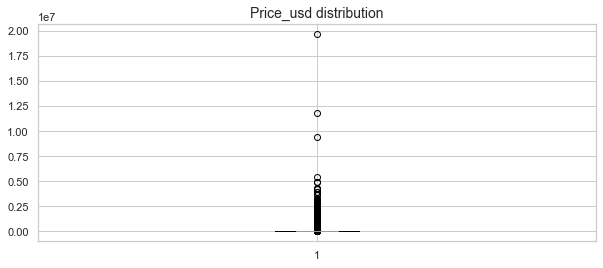

In [10]:
plt.figure(figsize=[10,4])
plt.title('Price_usd distribution',fontsize = 14)
plt.boxplot(training_data.price_usd,notch='True',patch_artist=True)

In [63]:

training_data.drop('visitor_hist_starrating',axis=1,inplace=True)
training_data.drop('visitor_hist_adr_usd',axis=1,inplace=True)
training_data.drop('gross_bookings_usd',axis=1,inplace=True)
training_data.drop('srch_query_affinity_score',axis=1,inplace=True)
training_data.drop('date_time',axis=1,inplace=True)
training_data.drop('prop_location_score2',axis=1,inplace=True)
training_data.drop('orig_destination_distance',axis=1,inplace=True)
training_data.drop('position',axis=1,inplace=True)

values = {'comp1_rate' : 0 , 'comp2_rate' : 0 , 'comp3_rate' : 0 , 'comp4_rate' : 0 , 'comp5_rate' : 0 ,
          'comp6_rate' : 0 , 'comp7_rate' : 0 , 'comp8_rate' : 0 ,
          'comp1_inv' : 0  , 'comp2_inv': 0   , 'comp3_inv' : 0  ,'comp4_inv' : 0   , 'comp5_inv' : 0  ,'comp6_inv' : 0 ,
          'comp7_inv' : 0  , 'comp8_inv' : 0  ,
          'comp1_rate_percent_diff' : 0, 'comp2_rate_percent_diff' : 0, 'comp3_rate_percent_diff' : 0,
          'comp4_rate_percent_diff' : 0, 'comp5_rate_percent_diff' : 0, 'comp6_rate_percent_diff' : 0,
          'comp7_rate_percent_diff' : 0, 'comp8_rate_percent_diff' : 0}

training_data.fillna(value = values, inplace=True)

# creating new features
training_data['competitor_rate'] = (training_data.comp1_rate + training_data.comp2_rate + training_data.comp3_rate +
                                    training_data.comp4_rate + training_data.comp5_rate + training_data.comp6_rate +
                                    training_data.comp7_rate + training_data.comp8_rate)

training_data['competitor_inv'] = (training_data.comp1_inv + training_data.comp2_inv + training_data.comp3_inv +
                                    training_data.comp4_inv + training_data.comp5_inv + training_data.comp6_inv +
                                    training_data.comp7_inv + training_data.comp8_inv)

training_data['competitor_rpd'] = (  training_data.comp1_rate_percent_diff + training_data.comp2_rate_percent_diff
                                   + training_data.comp3_rate_percent_diff + training_data.comp4_rate_percent_diff
                                   + training_data.comp5_rate_percent_diff + training_data.comp6_rate_percent_diff
                                   + training_data.comp7_rate_percent_diff + training_data.comp8_rate_percent_diff)/8/100

training_data.drop('comp1_rate',axis=1,inplace=True)
training_data.drop('comp2_rate',axis=1,inplace=True)
training_data.drop('comp3_rate',axis=1,inplace=True)
training_data.drop('comp4_rate',axis=1,inplace=True)
training_data.drop('comp5_rate',axis=1,inplace=True)
training_data.drop('comp6_rate',axis=1,inplace=True)
training_data.drop('comp7_rate',axis=1,inplace=True)
training_data.drop('comp8_rate',axis=1,inplace=True)
training_data.drop('comp1_inv',axis=1,inplace=True)
training_data.drop('comp1_rate_percent_diff',axis=1,inplace=True)
training_data.drop('comp2_inv',axis=1,inplace=True)
training_data.drop('comp2_rate_percent_diff',axis=1,inplace=True)
training_data.drop('comp3_inv',axis=1,inplace=True)
training_data.drop('comp3_rate_percent_diff',axis=1,inplace=True)
training_data.drop('comp4_inv',axis=1,inplace=True)
training_data.drop('comp4_rate_percent_diff',axis=1,inplace=True)
training_data.drop('comp5_inv',axis=1,inplace=True)
training_data.drop('comp5_rate_percent_diff',axis=1,inplace=True)
training_data.drop('comp6_inv',axis=1,inplace=True)
training_data.drop('comp6_rate_percent_diff',axis=1,inplace=True)
training_data.drop('comp7_inv',axis=1,inplace=True)
training_data.drop('comp7_rate_percent_diff',axis=1,inplace=True)
training_data.drop('comp8_inv',axis=1,inplace=True)
training_data.drop('comp8_rate_percent_diff',axis=1,inplace=True)

# Creating the basic feature
training_data['assign_score'] = training_data.click_bool + 4*training_data.booking_bool
training_data = training_data.drop(['booking_bool','click_bool'],axis = 1)

training_data['prop_review_score'].fillna(value = 0, inplace=True)
training_data = training_data[training_data.price_usd < 1800]

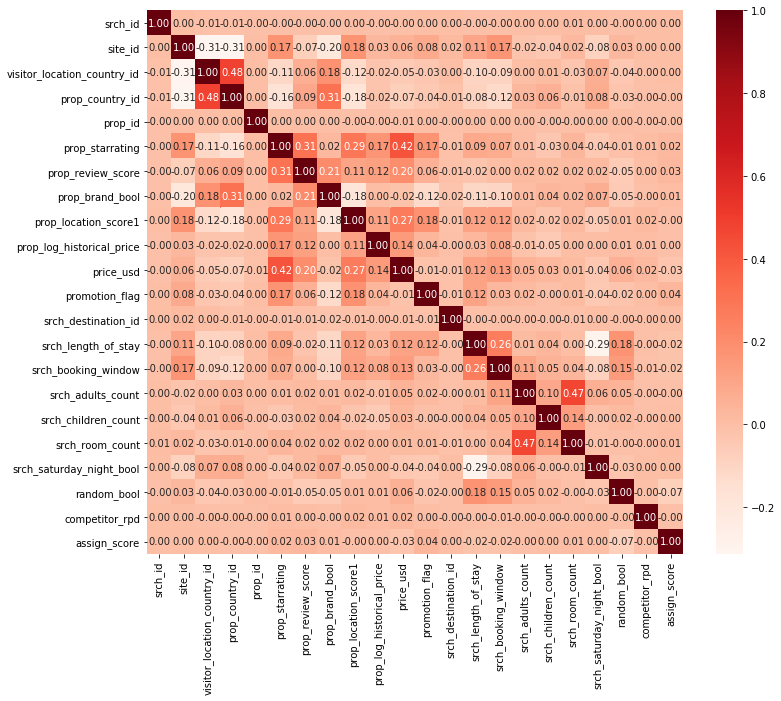

In [37]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = training_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt=".2f")
plt.show() 

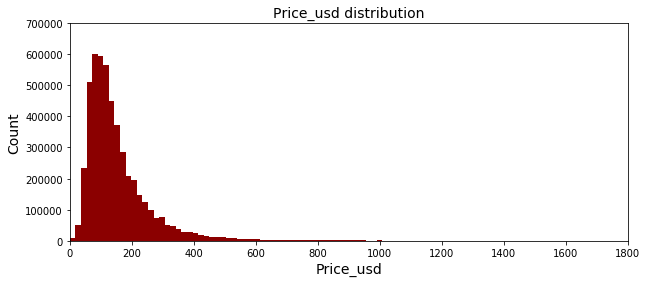

In [48]:
plt.figure(figsize=[10,4])
plt.title('Price_usd distribution',fontsize = 14)
plt.hist(training_data.price_usd, bins = 100,color='darkred')
plt.xlabel('Price_usd',fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.xlim((0,1800))
plt.ylim((0,700000))
plt.savefig('Price_usd.svg')

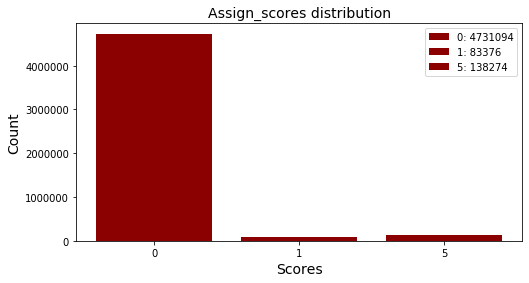

In [137]:
plt.figure(figsize=[8,4])
b= [4731094,83376,138274]
b1=str('0: 4731094')
b2=str('1: 83376')
b3=str('5: 138274')
a = training_data.assign_score.value_counts()
x1=['0']
x2=['1']
x3=['5']
y1=[a[0]]
y2=[a[1]]
y3=[a[5]]
plt.title('Assign_scores distribution',fontsize=14)
plt.xlabel('Scores',fontsize = 14)
plt.ylabel('Count',fontsize = 14)
plt.bar(x1,y1,color='darkred')
plt.bar(x2,y2,color='darkred')
plt.bar(x3,y3,color='darkred')
plt.legend((b1,b2,b3))   
plt.savefig('assign_score.svg')
plt.show()

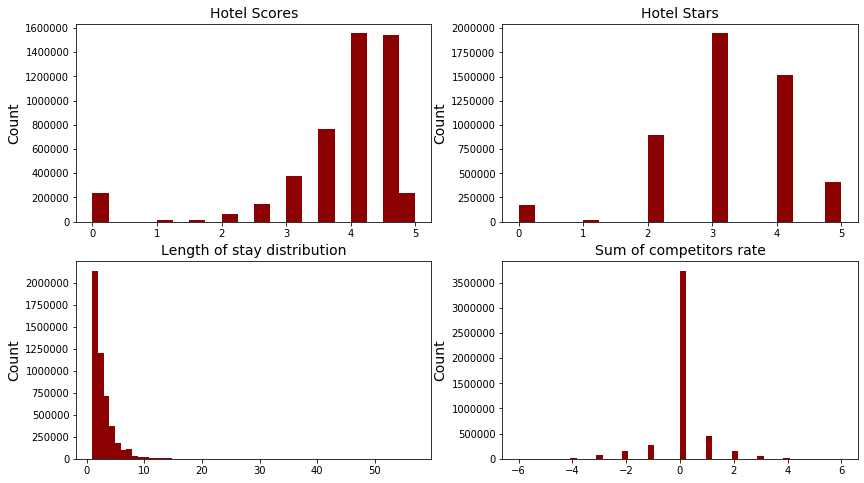

In [191]:
plt.figure(figsize=[14,8])

plt.subplot(2,2,1)
plt.title('Hotel Scores',fontsize = 14)
plt.hist(training_data.prop_review_score, bins = 20,color='darkred')
plt.ylabel('Count',fontsize = 14)

plt.subplot(2,2,2)
plt.title('Hotel Stars',fontsize = 14)
plt.hist(training_data.prop_starrating, bins = 20,color='darkred')
plt.ylabel('Count',fontsize = 14)

plt.subplot(2,2,3)
plt.title('Length of stay distribution',fontsize = 14)
plt.hist(training_data.srch_length_of_stay, bins = 57,color='darkred')
plt.ylabel('Count',fontsize = 14)

plt.subplot(2,2,4)
plt.title('Sum of competitors rate',fontsize = 14)
plt.hist(training_data.competitor_rate, bins = 50,color='darkred')
plt.ylabel('Count',fontsize = 14)

plt.savefig('Hotel_scores_stars_length_rates.svg')

In [208]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [216]:
X = training_data.iloc[:,0:21]  #independent columns
y = training_data.iloc[:,-1]    #target column i.e price range

In [217]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=21)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(21,'Score'))  #print 10 best features

                       Features          Score
14          srch_booking_window  405046.514250
10                    price_usd  401144.976852
4                       prop_id  152917.579912
0                       srch_id   95573.050749
19                  random_bool   78768.942993
12          srch_destination_id   34858.713303
3               prop_country_id   17925.728595
13          srch_length_of_stay   15900.657325
2   visitor_location_country_id   15339.277793
1                       site_id    6945.050348
11               promotion_flag    6307.034453
5               prop_starrating    1670.713733
6             prop_review_score    1026.012638
15            srch_adults_count     426.025181
7               prop_brand_bool     405.856394
16          srch_children_count     291.432425
8          prop_location_score1     278.236546
9     prop_log_historical_price     159.736811
18     srch_saturday_night_bool     135.940573
17              srch_room_count      50.461969
20           

In [64]:
test_data = pd.read_csv('test_set_VU_DM.csv') 

test_data.drop('visitor_hist_starrating',axis=1,inplace=True)
test_data.drop('visitor_hist_adr_usd',axis=1,inplace=True)
test_data.drop('srch_query_affinity_score',axis=1,inplace=True)
test_data.drop('date_time',axis=1,inplace=True)
test_data.drop('prop_location_score2',axis=1,inplace=True)
test_data.drop('orig_destination_distance',axis=1,inplace=True)


test_data.fillna(value = values, inplace=True)

test_data['competitor_rate'] = (test_data.comp1_rate + test_data.comp2_rate + test_data.comp3_rate +
                                test_data.comp4_rate + test_data.comp5_rate + test_data.comp6_rate +
                                test_data.comp7_rate + test_data.comp8_rate)

test_data['competitor_inv'] = (test_data.comp1_inv + test_data.comp2_inv + test_data.comp3_inv +
                               test_data.comp4_inv + test_data.comp5_inv + test_data.comp6_inv +
                               test_data.comp7_inv + test_data.comp8_inv)

test_data['competitor_rpd'] = (  test_data.comp1_rate_percent_diff + test_data.comp2_rate_percent_diff
                               + test_data.comp3_rate_percent_diff + test_data.comp4_rate_percent_diff
                               + test_data.comp5_rate_percent_diff + test_data.comp6_rate_percent_diff
                               + test_data.comp7_rate_percent_diff + test_data.comp8_rate_percent_diff)/8/100

test_data.drop('comp1_rate',axis=1,inplace=True)
test_data.drop('comp2_rate',axis=1,inplace=True)
test_data.drop('comp3_rate',axis=1,inplace=True)
test_data.drop('comp4_rate',axis=1,inplace=True)
test_data.drop('comp5_rate',axis=1,inplace=True)
test_data.drop('comp6_rate',axis=1,inplace=True)
test_data.drop('comp7_rate',axis=1,inplace=True)
test_data.drop('comp8_rate',axis=1,inplace=True)
test_data.drop('comp1_inv',axis=1,inplace=True)
test_data.drop('comp1_rate_percent_diff',axis=1,inplace=True)
test_data.drop('comp2_inv',axis=1,inplace=True)
test_data.drop('comp2_rate_percent_diff',axis=1,inplace=True)
test_data.drop('comp3_inv',axis=1,inplace=True)
test_data.drop('comp3_rate_percent_diff',axis=1,inplace=True)
test_data.drop('comp4_inv',axis=1,inplace=True)
test_data.drop('comp4_rate_percent_diff',axis=1,inplace=True)
test_data.drop('comp5_inv',axis=1,inplace=True)
test_data.drop('comp5_rate_percent_diff',axis=1,inplace=True)
test_data.drop('comp6_inv',axis=1,inplace=True)
test_data.drop('comp6_rate_percent_diff',axis=1,inplace=True)
test_data.drop('comp7_inv',axis=1,inplace=True)
test_data.drop('comp7_rate_percent_diff',axis=1,inplace=True)
test_data.drop('comp8_inv',axis=1,inplace=True)
test_data.drop('comp8_rate_percent_diff',axis=1,inplace=True)

test_data['prop_review_score'].fillna(value = 0, inplace=True)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(training_data, training_data.assign_score , test_size=0.30, random_state=42)

In [30]:
training_data = training_data.sort_values('srch_id')
training_data = training_data.reset_index(drop=True)
training_data_groups = training_data.srch_id.value_counts(sort=True,ascending=True).sort_index()
y_training = training_data.assign_score

train_search_ids = training_data.srch_id

training_data.drop(['srch_id','assign_score'],axis=1,inplace=True)


In [66]:
X_train = X_train.sort_values('srch_id')
X_train = X_train.reset_index(drop = True)
y_train = X_train.assign_score
train_search_ids = X_train.srch_id
train_groups = X_train.srch_id.value_counts(sort=True,ascending=True).sort_index()
X_train.drop(['srch_id','assign_score'],axis=1,inplace=True)

In [67]:
X_val = X_val.sort_values('srch_id')
X_val = X_val.reset_index(drop = True)
y_val = X_val.assign_score
val_groups = X_val.srch_id.value_counts(sort=True,ascending=True).sort_index()
val_search_ids = X_val.srch_id
X_val.drop(['srch_id','assign_score'],axis=1,inplace=True)

In [68]:
X_train.drop(['srch_saturday_night_bool','competitor_inv','srch_room_count','promotion_flag'],axis=1,inplace=True)

In [69]:
X_val.drop(['srch_saturday_night_bool','competitor_inv','srch_room_count','promotion_flag'],axis=1,inplace=True)

In [71]:
test_data.drop(['srch_saturday_night_bool','competitor_inv','srch_room_count','promotion_flag'],axis=1,inplace=True)

In [72]:
import pyltr

metric = pyltr.metrics.NDCG(k=10) 

monitor = pyltr.models.monitors.ValidationMonitor(X_val, y_val, val_search_ids, metric = metric) 

model = pyltr.models.LambdaMART(metric = metric, n_estimators =100, verbose =1, subsample=0.7,max_features=0.5) 

model.fit(X = X_train, y = y_train , qids = train_search_ids, monitor=monitor)


# saving our model to filename
filename = 'Lmart_small_model.sav'
pickle.dump(model, open(filename, 'wb'))

 Iter  Train score    Remaining                           Monitor Output 


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


    1       0.1582      696.96m C:12573023723223734.0000 B:12573023723223734.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


    2       0.1960      670.12m C:13814294139347242.0000 B:13814294139347242.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


    3       0.2306      661.05m C:15076471078980326.0000 B:15076471078980326.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


    4       0.2316      652.24m C:15093284000346110.0000 B:15093284000346110.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


    5       0.2334      643.23m C:15141573715798996.0000 B:15141573715798996.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


    6       0.2470      634.77m C:15594667769858748.0000 B:15594667769858748.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


    7       0.2478      626.35m C:15600204313466710.0000 B:15600204313466710.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


    8       0.2489      618.83m C:15642769838131818.0000 B:15642769838131818.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


    9       0.2494      613.39m C:15650825341789692.0000 B:15650825341789692.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


   10       0.2547      607.77m C:15814512761156740.0000 B:15814512761156740.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

   15       0.2673      577.30m C:16222255642617736.0000 B:16233997061667838.0000 S:  1


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

   20       0.2743      473.96m C:16459391053315224.0000 B:16459391053315224.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

   25       0.2848      401.90m C:16790232909025886.0000 B:16790232909025886.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

   30       0.2931      344.93m C:17071644664686238.0000 B:17071644664686238.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

   35       0.2977      301.09m C:17209990496923546.0000 B:17209990496923546.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

   40       0.2993      263.92m C:17263223955847916.0000 B:17263223955847916.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

   45       0.3017      231.41m C:17341203356414336.0000 B:17341203356414336.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

   50       0.3047      202.79m C:17437629584700558.0000 B:17437629584700558.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

   60       0.3075      153.48m C:17542402205547458.0000 B:17542402205547458.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

   70       0.3105      120.31m C:17624223475883300.0000 B:17624223475883300.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

   80       0.3123       87.80m C:17681487894063484.0000 B:17681487894063484.0000 S:  0


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

   90       0.3138       45.22m C:17724842101965146.0000 B:17727703647548030.0000 S:  1


C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\Users\adorr\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

Early termination at iteration  99


In [70]:
test_data = test_data.sort_values('srch_id')
test_data = test_data.reset_index(drop =True)
test_data_search_ids = test_data.srch_id

test_data_groups = test_data.srch_id.value_counts(sort=True,ascending=True).sort_index()

srch_id = test_data.srch_id
prop_id = test_data.prop_id
test_data.drop(['srch_id'],axis=1,inplace=True)


In [10]:
def create_result(rankings,srch_id,prop_id):
    predictions = pd.DataFrame(rankings,columns=['probs'])
    predictions = predictions.join(srch_id)
    predictions = predictions.join(prop_id)
    final_table = predictions.sort_values(by=['srch_id', 'probs'], ascending=[True, False])
    final_table.reset_index(drop = True, inplace = True)
    final_table = final_table.drop('probs',axis =1)
    
    return(final_table)

In [73]:
predLMART = model.predict(test_data)

In [74]:
final_table_lmart = create_result(predLMART,srch_id,prop_id)
print(final_table_lmart)

         srch_id  prop_id
0              1    99484
1              1    90385
2              1    72090
3              1    24194
4              1    34263
...          ...      ...
4959178   332787    22854
4959179   332787    99509
4959180   332787    94437
4959181   332787    33959
4959182   332787    35240

[4959183 rows x 2 columns]


In [75]:
final_table_lmart.to_csv('predLMART.csv',index = False)

In [55]:
import lightgbm as lgb

model2 = lgb.LGBMRanker(objective='lambdarank',n_estimators= 120, num_leaves=150,learning_rate= 0.1,score='ndcg',
                       subsample=0.8,subsample_freq=-1)

model2.fit(X_train, y_train, group=train_groups, eval_set = [(X_val,y_val)], eval_group=[val_groups])


[1]	valid_0's ndcg@1: 0.769154
[2]	valid_0's ndcg@1: 0.773214
[3]	valid_0's ndcg@1: 0.775025
[4]	valid_0's ndcg@1: 0.776341
[5]	valid_0's ndcg@1: 0.777292
[6]	valid_0's ndcg@1: 0.778112
[7]	valid_0's ndcg@1: 0.778715
[8]	valid_0's ndcg@1: 0.778984
[9]	valid_0's ndcg@1: 0.779443
[10]	valid_0's ndcg@1: 0.779297
[11]	valid_0's ndcg@1: 0.779789
[12]	valid_0's ndcg@1: 0.779759
[13]	valid_0's ndcg@1: 0.780367
[14]	valid_0's ndcg@1: 0.780337
[15]	valid_0's ndcg@1: 0.780641
[16]	valid_0's ndcg@1: 0.780555
[17]	valid_0's ndcg@1: 0.780625
[18]	valid_0's ndcg@1: 0.780655
[19]	valid_0's ndcg@1: 0.780883
[20]	valid_0's ndcg@1: 0.781015
[21]	valid_0's ndcg@1: 0.781142
[22]	valid_0's ndcg@1: 0.781167
[23]	valid_0's ndcg@1: 0.781659
[24]	valid_0's ndcg@1: 0.781841
[25]	valid_0's ndcg@1: 0.781953
[26]	valid_0's ndcg@1: 0.781973
[27]	valid_0's ndcg@1: 0.782171
[28]	valid_0's ndcg@1: 0.782302
[29]	valid_0's ndcg@1: 0.782338
[30]	valid_0's ndcg@1: 0.782343
[31]	valid_0's ndcg@1: 0.782268
[32]	valid_0's nd

LGBMRanker(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
           importance_type='split', learning_rate=0.1, max_depth=-1,
           min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
           n_estimators=120, n_jobs=-1, num_leaves=150, objective='lambdarank',
           random_state=None, reg_alpha=0.0, reg_lambda=0.0, score='ndcg',
           silent=True, subsample=0.8, subsample_for_bin=200000,
           subsample_freq=-1)

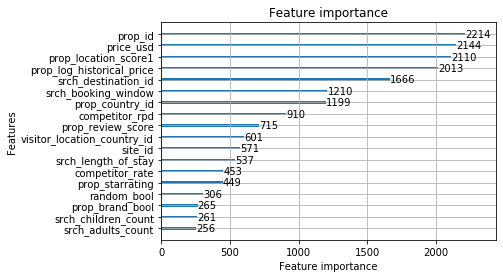

In [56]:
lgb.plot_importance(model2)

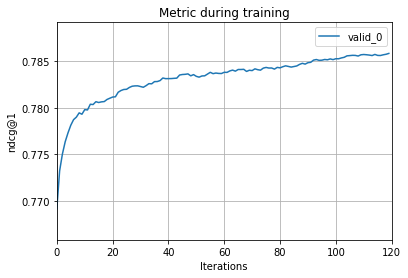

In [57]:
lgb.plot_metric(model2)

In [40]:
evaluation_lgb = model2.evals_result_

In [15]:
model2.best_score_

defaultdict(collections.OrderedDict,
            {'valid_0': OrderedDict([('ndcg@1', 0.7857274941806255)])})

In [16]:
model2.feature_importances_

array([ 489,  499, 1293, 1867,  700,  817,  317, 2111, 2128, 2468,  112,
       1315,  490,  953,  209,  258,   73,   36,  450,  357,  153,  785])

In [58]:
print(evaluation_lgb['valid_0']['ndcg@1'][-1])

0.7859017852077279


In [18]:
rankings_lgb = model2.predict(test_data)

In [19]:
final_table_lgb = create_result(rankings_lgb,srch_id,prop_id)
final_table_lgb.to_csv('rankings_lgb.csv',index = False)

In [20]:
print(final_table_lgb)

         srch_id  prop_id
0              1    99484
1              1    54937
2              1    90385
3              1    37567
4              1    24194
...          ...      ...
4959178   332787    99509
4959179   332787    33959
4959180   332787    32019
4959181   332787    94437
4959182   332787    35240

[4959183 rows x 2 columns]


In [16]:
from lightgbm.engine import SKLEARN_INSTALLED,_LGBMGroupKFold, _LGBMStratifiedKFold
import lightgbm.sklearn

In [34]:
import lightgbm as lgb

dftrainLGB = lgb.Dataset(data = training_data,
                         label = y_training,group=training_data_groups)

params = {'objective': 'lambdarank', 'num_leaves':'150','score':'ndcg','learning_rate':'0.01'}

cv_results = lgb.cv(params, dftrainLGB, num_boost_round=120, nfold=5,verbose_eval=1, stratified=False,show_stdv=False)

[1]	cv_agg's ndcg@1: 0.10286	cv_agg's ndcg@2: 0.153201	cv_agg's ndcg@3: 0.189309	cv_agg's ndcg@4: 0.218027	cv_agg's ndcg@5: 0.241372
[2]	cv_agg's ndcg@1: 0.1209	cv_agg's ndcg@2: 0.178207	cv_agg's ndcg@3: 0.217349	cv_agg's ndcg@4: 0.247115	cv_agg's ndcg@5: 0.271552
[3]	cv_agg's ndcg@1: 0.130355	cv_agg's ndcg@2: 0.189356	cv_agg's ndcg@3: 0.230198	cv_agg's ndcg@4: 0.260666	cv_agg's ndcg@5: 0.284936
[4]	cv_agg's ndcg@1: 0.135175	cv_agg's ndcg@2: 0.194667	cv_agg's ndcg@3: 0.235592	cv_agg's ndcg@4: 0.266777	cv_agg's ndcg@5: 0.291196
[5]	cv_agg's ndcg@1: 0.136402	cv_agg's ndcg@2: 0.197528	cv_agg's ndcg@3: 0.238836	cv_agg's ndcg@4: 0.269912	cv_agg's ndcg@5: 0.294284
[6]	cv_agg's ndcg@1: 0.138609	cv_agg's ndcg@2: 0.199564	cv_agg's ndcg@3: 0.241149	cv_agg's ndcg@4: 0.272575	cv_agg's ndcg@5: 0.297051
[7]	cv_agg's ndcg@1: 0.139913	cv_agg's ndcg@2: 0.201121	cv_agg's ndcg@3: 0.242988	cv_agg's ndcg@4: 0.274513	cv_agg's ndcg@5: 0.298684
[8]	cv_agg's ndcg@1: 0.141227	cv_agg's ndcg@2: 0.202923	cv_agg's 

[63]	cv_agg's ndcg@1: 0.149675	cv_agg's ndcg@2: 0.213902	cv_agg's ndcg@3: 0.256211	cv_agg's ndcg@4: 0.287596	cv_agg's ndcg@5: 0.312178
[64]	cv_agg's ndcg@1: 0.149401	cv_agg's ndcg@2: 0.213693	cv_agg's ndcg@3: 0.256127	cv_agg's ndcg@4: 0.287477	cv_agg's ndcg@5: 0.312178
[65]	cv_agg's ndcg@1: 0.149771	cv_agg's ndcg@2: 0.213844	cv_agg's ndcg@3: 0.256461	cv_agg's ndcg@4: 0.287738	cv_agg's ndcg@5: 0.312434
[66]	cv_agg's ndcg@1: 0.15003	cv_agg's ndcg@2: 0.213831	cv_agg's ndcg@3: 0.256541	cv_agg's ndcg@4: 0.287827	cv_agg's ndcg@5: 0.312485
[67]	cv_agg's ndcg@1: 0.150066	cv_agg's ndcg@2: 0.213967	cv_agg's ndcg@3: 0.256532	cv_agg's ndcg@4: 0.288006	cv_agg's ndcg@5: 0.312559
[68]	cv_agg's ndcg@1: 0.15013	cv_agg's ndcg@2: 0.214045	cv_agg's ndcg@3: 0.256443	cv_agg's ndcg@4: 0.287966	cv_agg's ndcg@5: 0.312633
[69]	cv_agg's ndcg@1: 0.150381	cv_agg's ndcg@2: 0.214129	cv_agg's ndcg@3: 0.256735	cv_agg's ndcg@4: 0.288033	cv_agg's ndcg@5: 0.312687
[70]	cv_agg's ndcg@1: 0.150144	cv_agg's ndcg@2: 0.214144	

In [35]:
crossval = pd.DataFrame(cv_results)
print(crossval)

     ndcg@1-mean  ndcg@1-stdv  ndcg@2-mean  ndcg@2-stdv  ndcg@3-mean  \
0       0.102860     0.001223     0.153201     0.001141     0.189309   
1       0.120900     0.000880     0.178207     0.001177     0.217349   
2       0.130355     0.000938     0.189356     0.001204     0.230198   
3       0.135175     0.001431     0.194667     0.001515     0.235592   
4       0.136402     0.001901     0.197528     0.001903     0.238836   
..           ...          ...          ...          ...          ...   
115     0.151431     0.001306     0.215548     0.000958     0.258117   
116     0.151481     0.001274     0.215447     0.000924     0.258343   
117     0.151500     0.001293     0.215514     0.000911     0.258358   
118     0.151489     0.001285     0.215610     0.000934     0.258270   
119     0.151646     0.001124     0.215506     0.000841     0.258304   

     ndcg@3-stdv  ndcg@4-mean  ndcg@4-stdv  ndcg@5-mean  ndcg@5-stdv  
0       0.001216     0.218027     0.001124     0.241372     0.00

In [59]:
import xgboost as xgb

model3 = xgb.sklearn.XGBRanker(objective = 'rank:pairwise', learning_rate= 0.1,gamma= 1.0, min_child_weight= 0.1,
                                n_estimators= 120,subsample=0.7,max_depth=8)

model3.fit(X_train, y_train, train_groups, eval_set=[(X_val, y_val)], eval_group=[val_groups],eval_metric = 'ndcg')


XGBRanker(base_score=0.5, booster='gbtree', colsample_bylevel=1,
          colsample_bynode=1, colsample_bytree=1, gamma=1.0, learning_rate=0.1,
          max_delta_step=0, max_depth=8, min_child_weight=0.1, missing=None,
          n_estimators=120, n_jobs=-1, nthread=None, objective='rank:pairwise',
          random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
          seed=None, silent=None, subsample=0.7, verbosity=1)

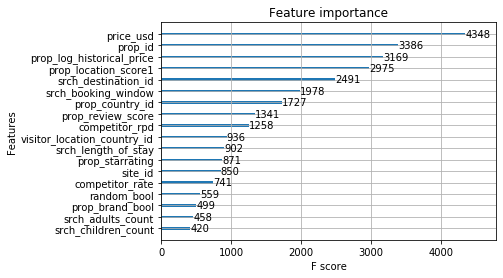

In [60]:
xgb.plot_importance(model3)

In [61]:
evaluation_xgb = model3.evals_result

print(evaluation_xgb['eval_0']['ndcg'][-1])

0.884621


In [48]:
model3.feature_importances_

array([0.01024028, 0.00924514, 0.01705687, 0.0091515 , 0.0810339 ,
       0.0373193 , 0.01606375, 0.01424119, 0.01943844, 0.03311645,
       0.6446722 , 0.00891716, 0.0102407 , 0.01039727, 0.00745768,
       0.00998407, 0.00678061, 0.00717025, 0.01949587, 0.0103983 ,
       0.00799576, 0.0095833 ], dtype=float32)

In [49]:
rankings_xgb = model3.predict(test_data)

In [50]:
final_table_xgb = create_result(rankings_xgb,srch_id,prop_id)
final_table_xgb.to_csv('rankings_xgb.csv',index = False)

In [51]:
print(final_table_xgb)

         srch_id  prop_id
0              1    99484
1              1    54937
2              1    61934
3              1    90385
4              1    24194
...          ...      ...
4959178   332787    29018
4959179   332787    32019
4959180   332787    33959
4959181   332787    94437
4959182   332787    35240

[4959183 rows x 2 columns]


In [28]:
table = pd.DataFrame()
table['srch_id'] = srch_id
table['prob_id_lgb'] = final_table_lgb['prop_id']
table['prob_id_xgb'] = final_table_xgb['prop_id']
print(table)

         srch_id  prob_id_lgb  prob_id_xgb
0              1        99484        99484
1              1        54937        61934
2              1        90385        54937
3              1        37567        72090
4              1        24194        37567
...          ...          ...          ...
4959178   332787        99509        32019
4959179   332787        33959        22854
4959180   332787        32019        33959
4959181   332787        94437        94437
4959182   332787        35240        35240

[4959183 rows x 3 columns]
